In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv("../dataset/used_car_train_20200313.csv",sep=" ")
test = pd.read_csv("../dataset/used_car_testA_20200313.csv",sep=" ")

数据总览

In [3]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
print(train.info())
print("-"*30)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [5]:
print(train.describe())
print(test.describe())

              SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       

In [6]:
#查看SaleID是否有重复值，没有就将SaleID作为索引
print(train.SaleID.unique().size)
print(test.SaleID.unique().size)

150000
50000


In [7]:
##确认没有重复，将saleid设为索引
train.set_index("SaleID",inplace=True)
test.set_index("SaleID",inplace=True)

In [8]:
##查看训练集数据和测试集数据的具体差异
for i in train.columns:
    if train[i].unique().size <=10:
         print(i);print(train[i].unique())
print("-"*30)
for i in test.columns:
    if test[i].unique().size <=10:
        print(i);print(test[i].unique())

bodyType
[ 1.  2.  0.  5.  3. nan  6.  7.  4.]
fuelType
[ 0.  1. nan  2.  3.  4.  5.  6.]
gearbox
[ 0.  1. nan]
notRepairedDamage
['0.0' '-' '1.0']
seller
[0 1]
offerType
[0]
------------------------------
bodyType
[ 5.  0.  2.  3.  6.  1. nan  4.  7.]
fuelType
[ 1.  0.  3. nan  2.  4.  6.  5.]
gearbox
[ 1.  0. nan]
notRepairedDamage
['0.0' '1.0' '-']
seller
[0]
offerType
[0]


In [9]:
#可以把offerType删除
#再查看一下seller的数值分布，考虑是否删除
train.seller.value_counts() #可以删除

0    149999
1         1
Name: seller, dtype: int64

In [10]:
#删除offerType,和seller
train = train.drop(["seller","offerType"],axis=1)
test = test.drop(["seller","offerType"],axis=1)

缺失值和异常值检测

In [11]:
print(train.isnull().sum())
print("-"*30)
print(test.isnull().sum())

name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64
------------------------------
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer           

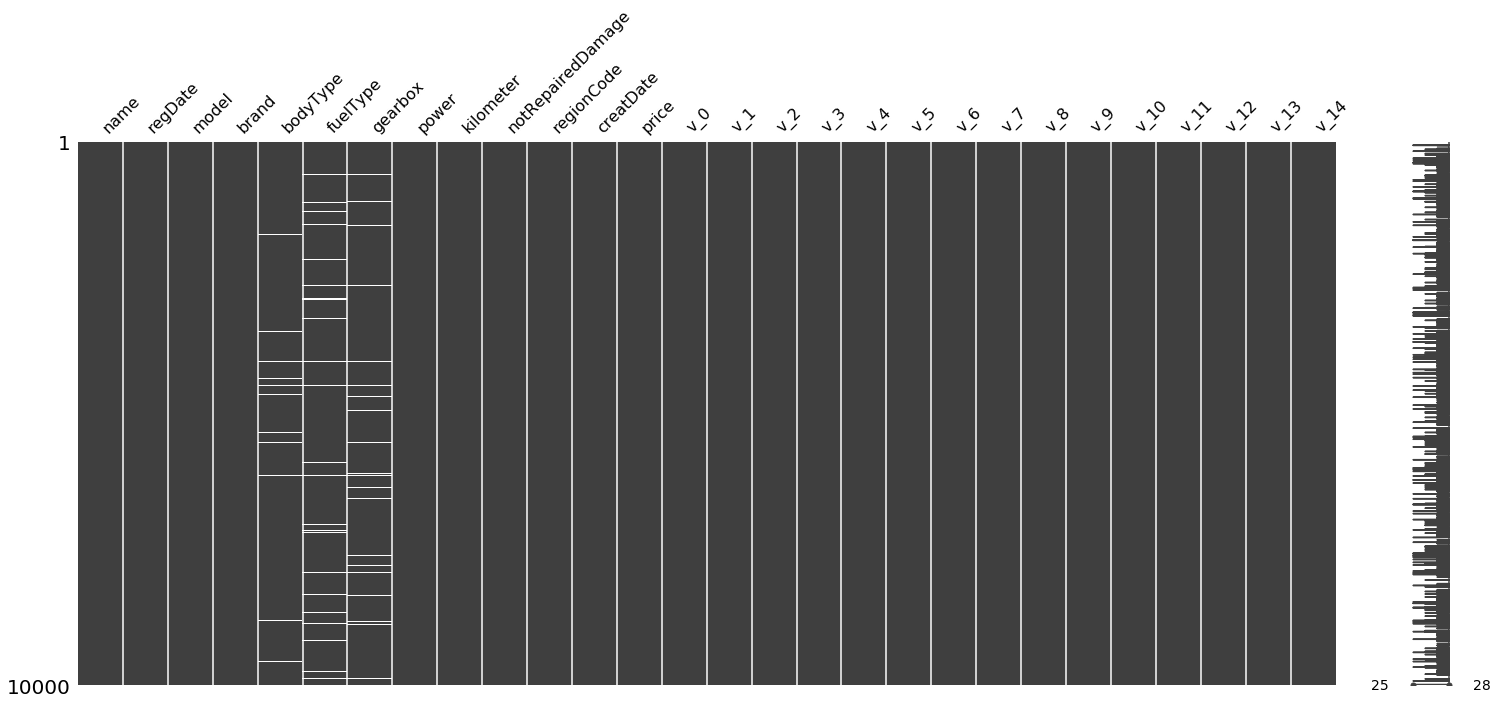

In [12]:
##可视化缺失部分
msno.matrix(train.sample(10000))

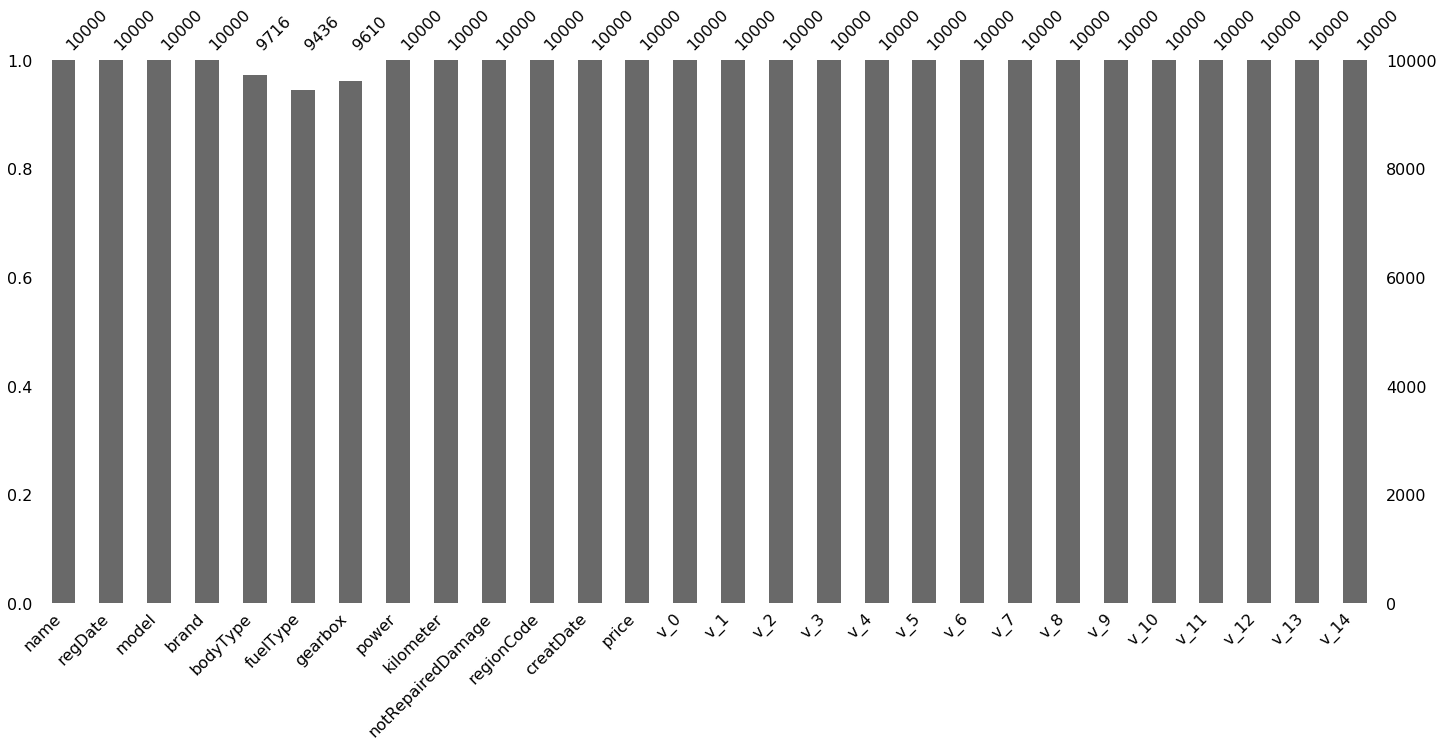

In [13]:
msno.bar(train.sample(10000))

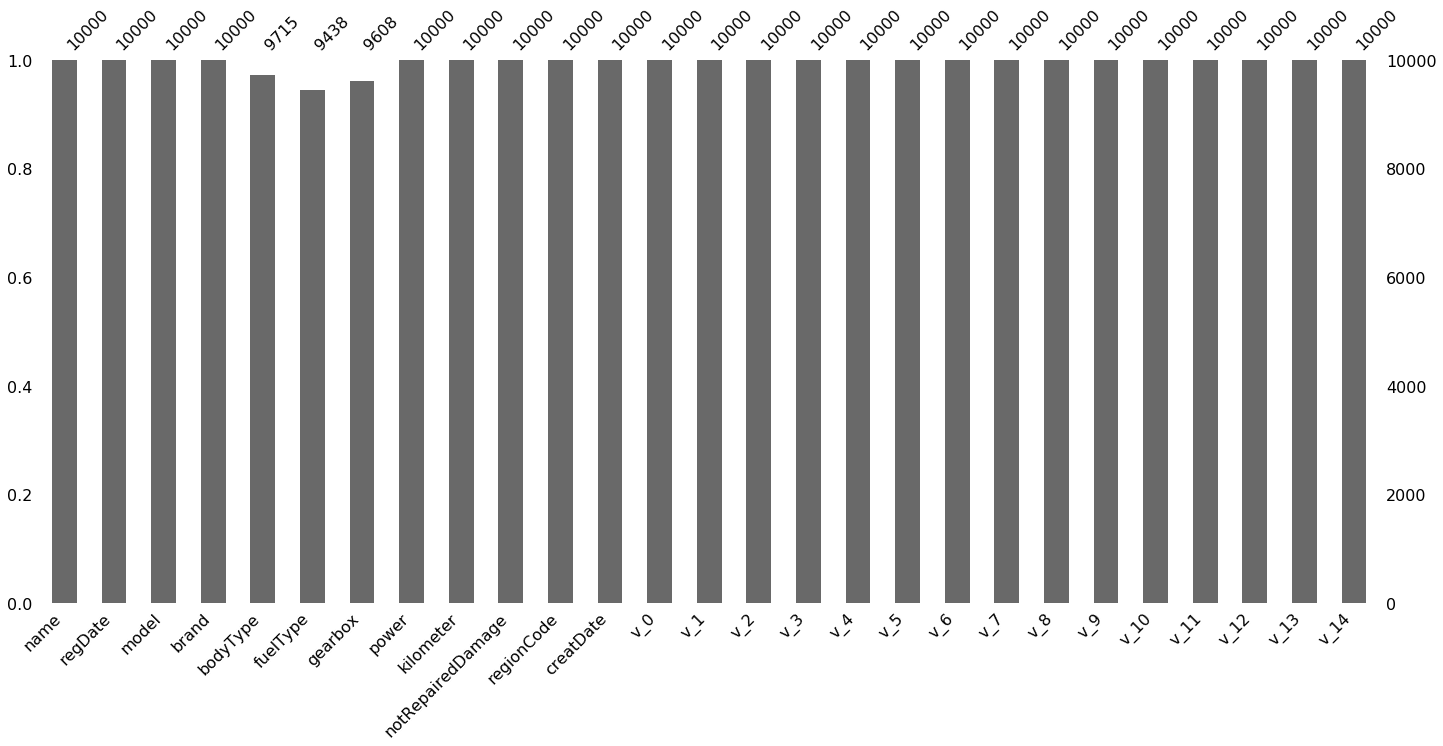

In [14]:
msno.bar(test.sample(10000))

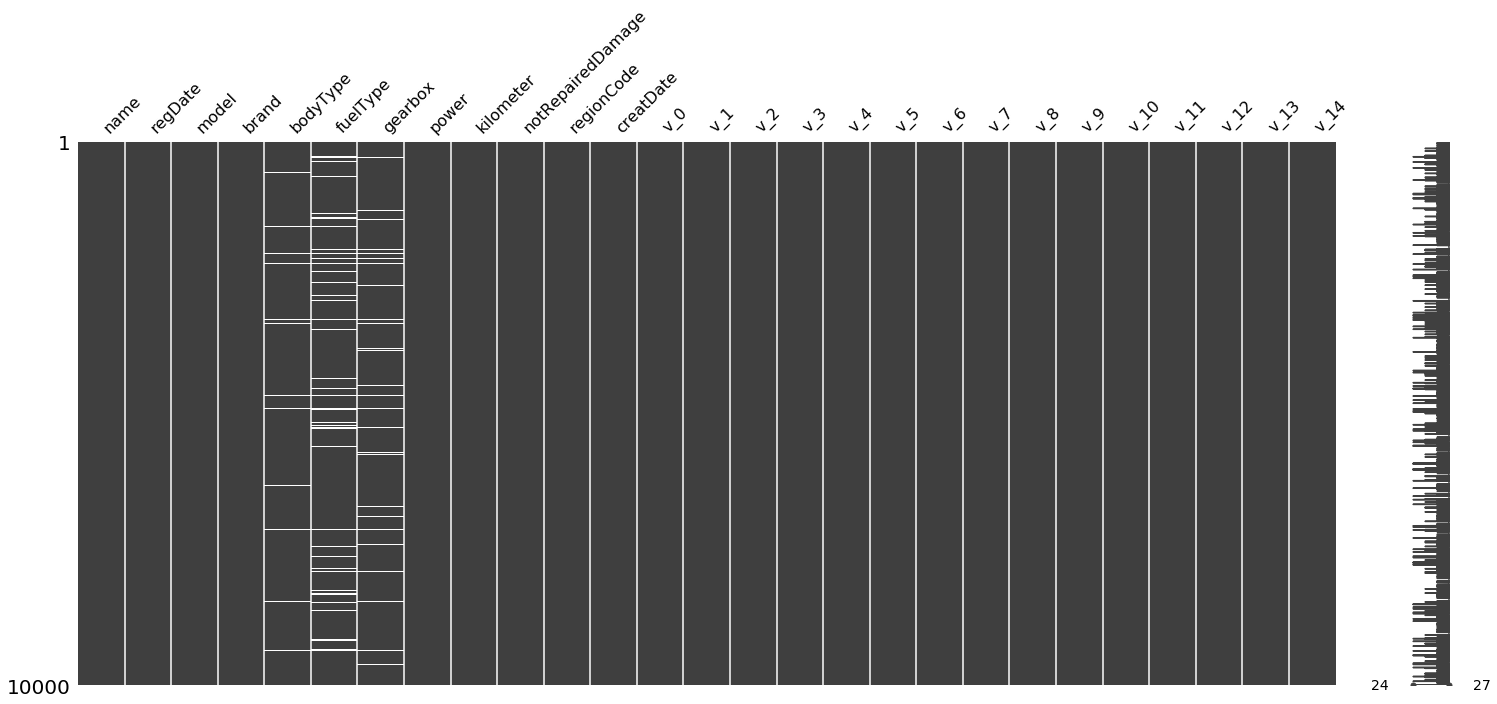

In [15]:
msno.matrix(test.sample(10000))

其实缺失值还不是特别的多，可以暂时不做处理，因为树模型可以很好的优化缺失值

In [16]:
#从上面的值可以看到，notRepairedDamage这个属性也存在隐性的缺失值 "-"
train.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [17]:
#用nan来替换‘-’，并且后期使用树模型将nan优化
train['notRepairedDamage'].replace('-', np.nan, inplace=True)
test['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [18]:
print(train.columns)
print(test.columns)

Index(['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'creatDate',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')
Index(['name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'creatDate',
       'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


count    150000.000000
mean       5923.327333
std        7501.998477
min          11.000000
25%        1300.000000
50%        3250.000000
75%        7700.000000
max       99999.000000
Name: price, dtype: float64
500     2337
1500    2158
1200    1922
1000    1850
2500    1821
Name: price, dtype: int64


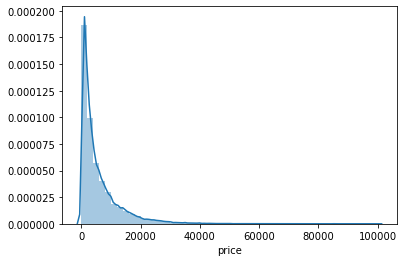

In [19]:
#先查看目标的分布，可以根据其分布决定选取哪种模型
y = train.price
print(y.describe())
print(y.value_counts().head())
sns.distplot(y)  ###可以看出，目标成长尾分布，需要进行log处理或者幂变换

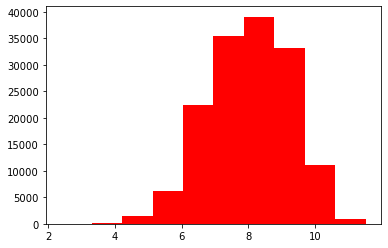

In [20]:
#将价格对数转换后就平稳了很多
plt.hist(np.log(train['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

In [21]:
#对于数值型数据，和object型，分开讨论，根据实际含义来划分
numerical =  ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical= ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [22]:
#查看数值类型的情况

for i in numerical:
    print("属性{0}有{1}个值：".format(i,len(train[i].unique())))
    print(train[i].value_counts().head(10))
    print("-"*30)

属性power有566个值：
0      12829
75      9593
150     6495
60      6374
140     5963
101     5537
116     5177
90      4890
170     4791
105     4457
Name: power, dtype: int64
------------------------------
属性kilometer有13个值：
15.0    96877
12.5    15722
10.0     6459
9.0      5257
8.0      4573
7.0      4084
6.0      3725
5.0      3144
4.0      2718
3.0      2501
Name: kilometer, dtype: int64
------------------------------
属性v_0有143997个值：
45.349115    20
48.087217    16
47.568450    15
48.618150    15
47.840357    15
48.251430    15
48.433440    14
47.802989    14
48.265907    14
47.666444    12
Name: v_0, dtype: int64
------------------------------
属性v_1有143998个值：
-3.245133    20
 3.183323    16
 1.942732    15
 3.354949    15
 2.796739    15
 3.116688    15
 2.886858    14
 3.396244    14
 3.195363    14
 3.400295    12
Name: v_1, dtype: int64
------------------------------
属性v_2有143997个值：
-0.349860    20
 0.826577    16
 0.887762    15
-0.158364    15
 0.980616    15
 0.030708    15
-0.02

In [23]:
for i in categorical:
    print("属性{0}有{1}个值：".format(i,len(train[i].unique())))
    print(train[i].value_counts().head(10))
    print("-"*30)

属性name有99662个值：
708     282
387     282
55      280
1541    263
203     233
53      221
713     217
290     197
1186    184
911     182
Name: name, dtype: int64
------------------------------
属性model有249个值：
0.0     11762
19.0     9573
4.0      8445
1.0      6038
29.0     5186
48.0     5052
40.0     4502
26.0     4496
8.0      4391
31.0     3827
Name: model, dtype: int64
------------------------------
属性brand有40个值：
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
Name: brand, dtype: int64
------------------------------
属性bodyType有9个值：
0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64
------------------------------
属性fuelType有8个值：
0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64
------------------------------
属性gearbox有3个值：
0.0    111623
1.0     32396
Name: gearbox, 

In [24]:
#查看数值型数据的偏度和峰度
def get_con(df,subsets):
    data = {}
    for i in subsets:
        data.setdefault(i,[])
        data[i].append(df[i].skew()) #偏度
        data[i].append(df[i].kurt()) #峰度
        data[i].append(df[i].mean()) #均值
        data[i].append(df[i].median()) #中位数
        data[i].append(df[i].std()) #标准差
        data[i].append(df[i].std()/df[i].mean()) #变异系数
        data[i].append(df[i].max()-df[i].min()) #极差
    data_df = pd.DataFrame(data,index=["偏度","峰度","均值","中位数","标准差","变异系数","极差"])
    return data_df.T
    

In [25]:
get_con(train,numerical) #数值型数据

,偏度,峰度,均值,中位数,标准差,变异系数,极差
power,65.863178,5733.451054,119.316547,110.000000,177.168419,1.484860,19312.000000
kilometer,-1.525921,1.141934,12.597160,15.000000,3.919576,0.311148,14.500000
v_0,-1.316712,3.993841,44.406268,44.610266,2.457548,0.055342,21.852202
v_1,0.359454,-1.753017,-0.044809,-3.052671,3.641893,-81.275704,11.615897
v_2,4.842556,23.860591,0.080765,-0.382947,2.929618,36.273334,23.506168
v_3,0.106292,-0.418006,0.078833,0.099722,2.026514,25.706280,17.129738
v_4,0.367989,-0.197295,0.017875,-0.075910,1.193661,66.779699,11.193917
v_5,-4.737094,22.934081,0.248204,0.257798,0.045804,0.184542,0.291838
v_6,0.368073,-1.742567,0.044923,0.000812,0.051743,1.151810,0.151420
v_7,5.130233,25.845489,0.124692,0.095866,0.201410,1.615250,1.404936


575         1
7512        1
348         1
604         1
732         1
        ...  
140      5963
60       6374
150      6495
75       9593
0       12829
Name: power, Length: 566, dtype: int64
19312


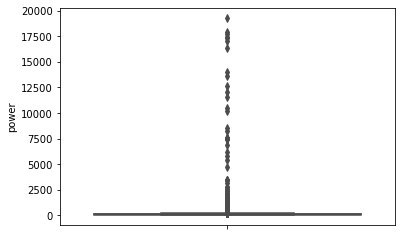

In [26]:
#其实可以看出power是有有点问题的
#查看一下power的分布情况
print(train.power.value_counts().sort_values())
print(train.power.max())
sns.boxplot(train["power"],orient='v',color='r')  #可以看出这个功率数值确实有问题，功率上千了

In [27]:
outliers = train[train["power"]>train.power.quantile(0.75)+(train.power.quantile(0.75)-train.power.quantile(0.25))*1.5]["power"].index

In [28]:
np.log(train["power"][outliers]+1)

SaleID
33        5.726848
77        6.216606
104       5.707110
138       5.771441
163       5.831882
            ...   
149956    5.723585
149964    5.811141
149967    5.659482
149981    5.634790
149984    5.609472
Name: power, Length: 4878, dtype: float64

In [29]:
train.power.describe()

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

In [30]:
#定义一个函数，对属性进行离群点检测，并做对数变换
upper_limit = train.power.quantile(0.75)+(train.power.quantile(0.75)-train.power.quantile(0.25))*1.5  #上界限为 75%分位数+（75%分位数-25%分位数）*1.5
lower_limit = train.power.quantile(0.25)-(train.power.quantile(0.75)-train.power.quantile(0.25))*1.5  #下界限为 25%分位数-（75%分位数-25%分位数）*1.5
def outlier_detect(df):
    if df>upper_limit:
        df = np.log(df)
        return df
    else:
        return df


In [31]:
train["power"] = train["power"].apply(outlier_detect)

In [32]:
train["power"].describe()

count    150000.000000
mean        106.168443
std          58.853662
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max         262.000000
Name: power, dtype: float64

In [33]:
numerical.append("price")

In [34]:
##查看数值型数据与价格之间的关系
print(train[numerical].corr()['price'].sort_values(ascending = False))

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.260337
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64


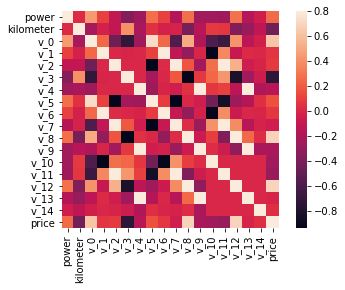

In [35]:
sns.heatmap(train[numerical].corr(),square = True,  vmax=0.8)

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


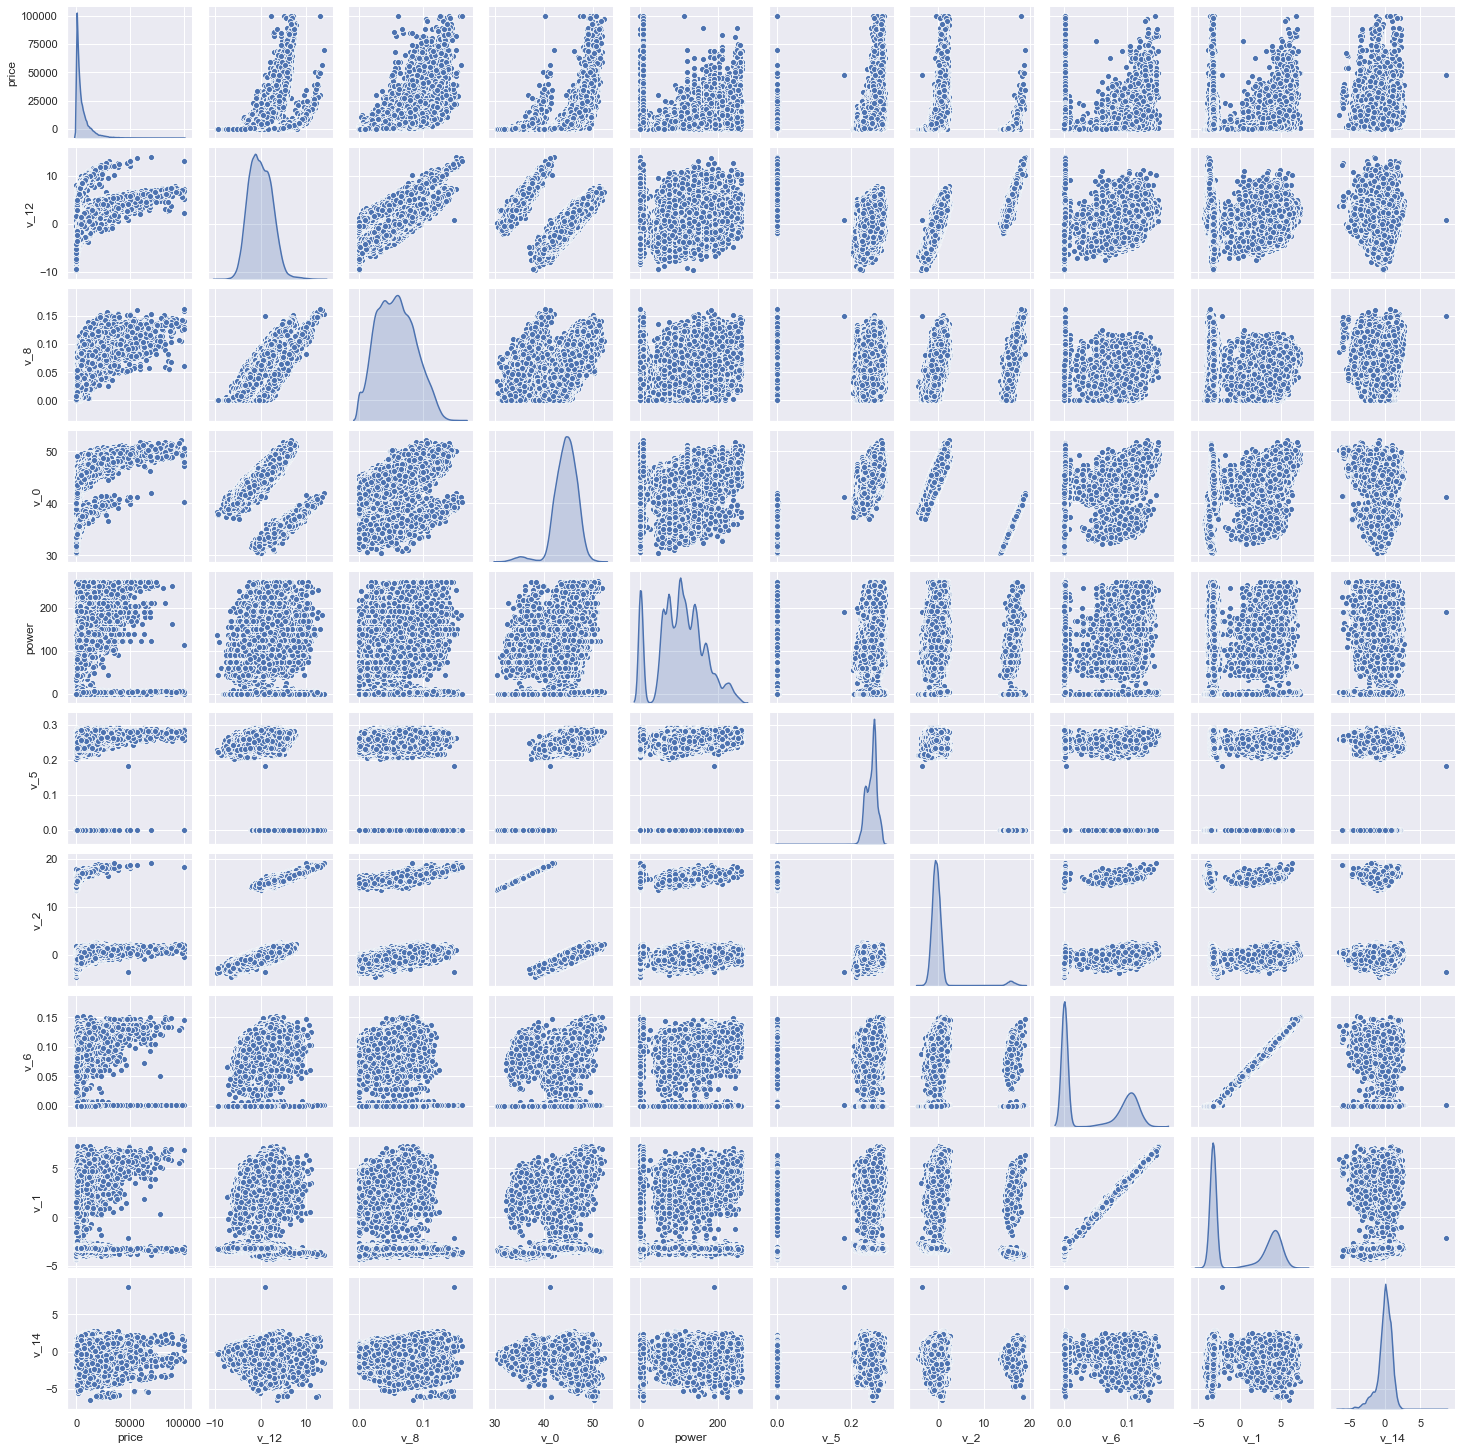

In [36]:
#数值类型数据互相的关系
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()




In [37]:
#object类型的数据分析
categorical

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

In [38]:
for i in categorical:
    print(train[i].value_counts())
    print("-"*30)

708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
------------------------------
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
------------------------------
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
------------------------------
0.0

特征工程

In [39]:
#将数据并到一起
train['train']=1
test['train']=0
data = pd.concat([train, test], ignore_index=True)

In [40]:
data.head()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,736,20040402,30.0,6,1.0,0.0,0.0,60.0,12.5,0.0,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1
1,2262,20030301,40.0,1,2.0,0.0,0.0,0.0,15.0,NaN,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
2,14874,20040403,115.0,15,1.0,0.0,0.0,163.0,12.5,0.0,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1
3,71865,19960908,109.0,10,0.0,0.0,1.0,193.0,15.0,0.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1
4,111080,20120103,110.0,5,1.0,0.0,0.0,68.0,5.0,0.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1


In [41]:
#从之前的数据分析中，可以了解到，有几列数据是时间数据，这个可以整合出一个新的特征
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [42]:
data['used_time'].isnull().sum()

15101

In [43]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
data = data

In [44]:
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60.0
1,NaN,0.0
2,16.0,163.0
3,19.0,193.0
4,6.0,68.0


In [45]:
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [46]:
print(data.shape)
data.columns

(200000, 29)


Index(['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'train', 'used_time', 'city', 'power_bin'],
      dtype='object')

In [47]:
data.to_csv('data_for_tree.csv', index=0)

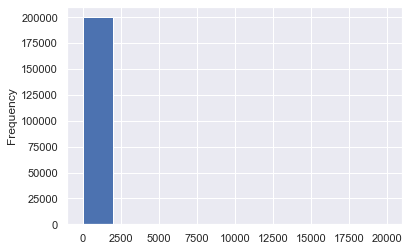

In [48]:
data['power'].plot.hist()

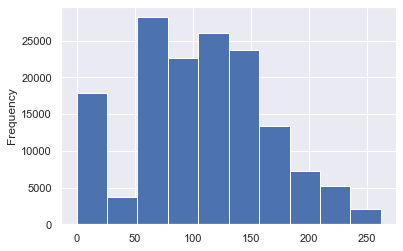

In [49]:
train['power'].plot.hist()

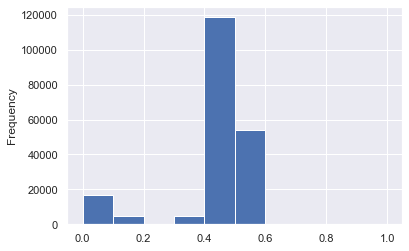

In [50]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

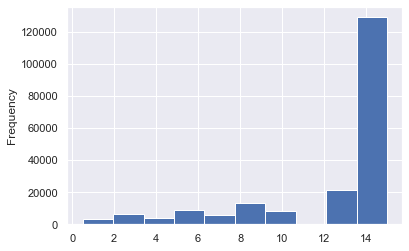

In [51]:
data['kilometer'].plot.hist()

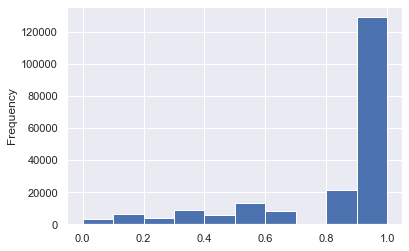

In [52]:
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [53]:
Train_gb = train.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

In [54]:
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [55]:
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [56]:
print(data.shape)
data.columns

(200000, 366)


Index(['name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=366)

In [57]:
data.to_csv('data_for_lr.csv', index=0)

## 特征筛选

### 过滤式
利用相关系数进行筛选，这一步在数据分析的过程中已经涉及到

In [58]:
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.45537602011603306
-0.4097783640876424
0.05438301230221679
0.38875954584355615
0.2587402623951201
0.39159165603497703


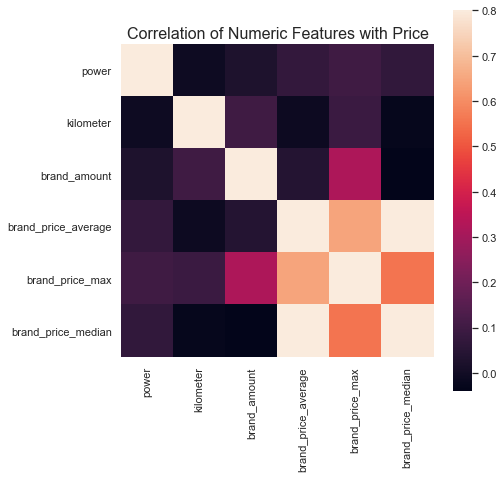

In [59]:
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average', 
                     'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

### 包裹式

In [60]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [61]:
sample_feature = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))

Memory usage of dataframe is 46400128.00 MB
Memory usage after optimization is: 12000128.00 MB
Decreased by 74.1%


In [62]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]

In [63]:
sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
train = sample_feature[continuous_feature_names + ['price']]

train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y_ln)

In [65]:
print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:15.261924108111977


[('v_5', 22.617701548112354),
 ('v_9', 15.468430224593146),
 ('v_7', 4.051766648566776),
 ('v_12', 3.696932842058469),
 ('v_1', 2.5661403169035673),
 ('v_3', 2.1167023961507505),
 ('v_13', 1.7623025243561956),
 ('v_11', 1.4955359607428031),
 ('gearbox', 0.05158373442642704),
 ('bodyType', 0.001406575891005843),
 ('power', 0.0004746282175427138),
 ('used_time', 1.6038430547563298e-06),
 ('train', -4.069988790433854e-11),
 ('name', -7.730976604173361e-08),
 ('power_bin', -0.0007852020039657545),
 ('city', -0.0009177502296810386),
 ('fuelType', -0.0016246849850284973),
 ('kilometer', -0.011190023258692816),
 ('v_0', -0.05637714908049216),
 ('v_14', -0.0614929631652006),
 ('v_10', -0.23422833322915118),
 ('notRepairedDamage', -0.2716532294975696),
 ('v_4', -1.5809265738788492),
 ('v_2', -2.7091225638359435),
 ('v_8', -29.658313216112624),
 ('v_6', -218.26070740428767)]

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [68]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [69]:
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imp

In [70]:
print('AVG:', np.mean(scores))

AVG: 1.425342721421319


In [71]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,1.408987,1.439028,1.439474,1.418063,1.421162


In [72]:
from sklearn.model_selection import learning_curve, validation_curve

In [73]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'D:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

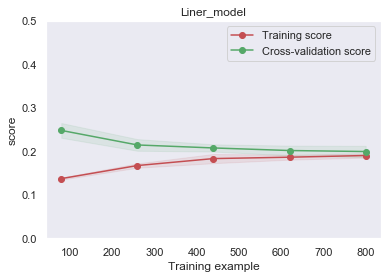

In [74]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

In [75]:
train = sample_feature[continuous_feature_names + ['price']].dropna()

train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [82]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [83]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [79]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.197157,0.200117,0.483314
cv2,0.200102,0.203317,0.486100
cv3,0.201453,0.204422,0.489434
cv4,0.195765,0.198631,0.476763
cv5,0.202549,0.205347,0.484593


intercept:15.261924108025969


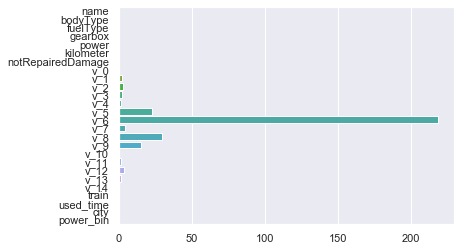

In [80]:
model = LinearRegression().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)